# **Tugas Praktikum**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

## **Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [1]:
#Import Library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
#Baca data dari insurance.csv
data = pd.read_csv('insurance.csv')

In [4]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\Alif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


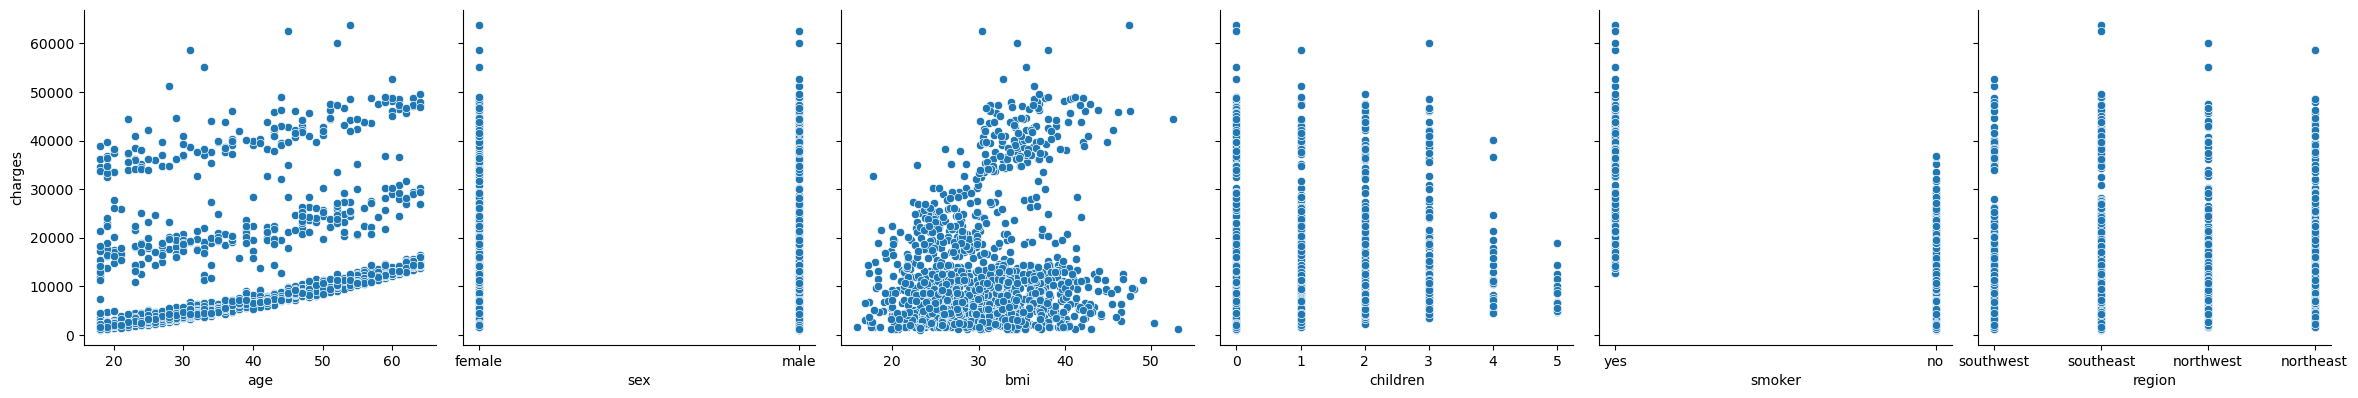

In [5]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
            y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

C:\Users\Alif\AppData\Local\Temp\ipykernel_4780\1286170800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


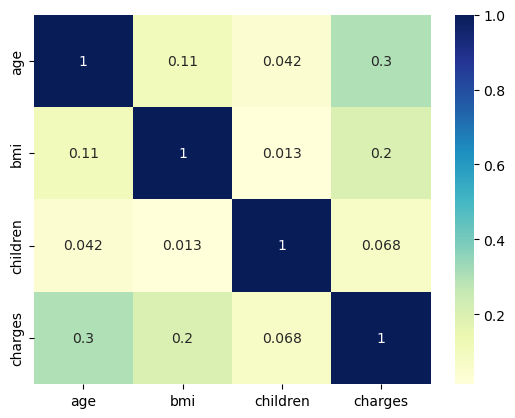

In [6]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [12]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data[['age', 'bmi']]
y = data['charges']

In [13]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

3. Lakukan feature scaling jika diperlukan.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Melakukan scaling pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan scaling pada data uji dengan menggunakan parameter yang sama seperti pada data latih
X_test_scaled = scaler.transform(X_test)


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [16]:
from sklearn.linear_model import LinearRegression

# Inisialisasi objek model
model = LinearRegression()


5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [17]:
# Melatih model dengan data latih yang telah di-scaled
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji yang telah di-scaled
y_pred = model.predict(X_test_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Mean Squared Error (MSE): 129696311.34332742
Mean Absolute Error (MAE): 8919.311771816696
R-squared (R2): 0.10676050395208692
Root Mean Squared Error (RMSE): 11388.4288355913


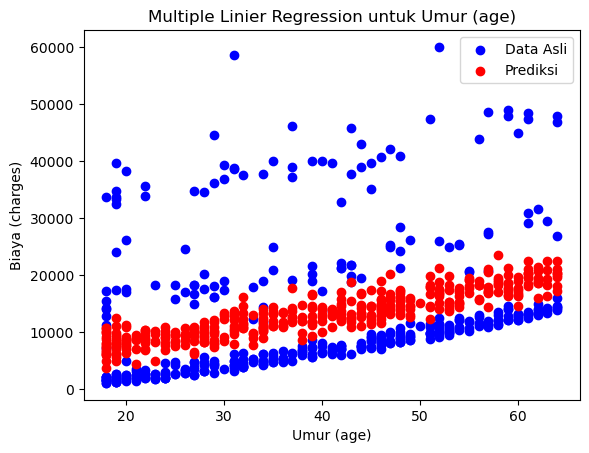

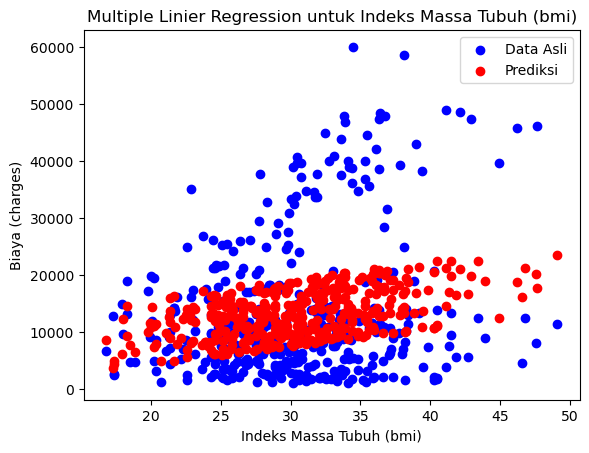

In [18]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menghitung metrik evaluasi (misalnya, RMSE dan R-squared)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# Membuat plot multiple linier regression untuk age
plt.scatter(X_test['age'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['age'], y_pred, color='red', label='Prediksi')
plt.xlabel("Umur (age)")
plt.ylabel("Biaya (charges)")
plt.title("Multiple Linier Regression untuk Umur (age)")
plt.legend()
plt.show()

# Membuat plot multiple linier regression untuk bmi
plt.scatter(X_test['bmi'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['bmi'], y_pred, color='red', label='Prediksi')
plt.xlabel("Indeks Massa Tubuh (bmi)")
plt.ylabel("Biaya (charges)")
plt.title("Multiple Linier Regression untuk Indeks Massa Tubuh (bmi)")
plt.legend()
plt.show()
